# Importing Overlay

In [2]:
from pynq import Overlay

In [3]:
overlay = Overlay("./fft_1024.bit")
overlay?

In [26]:
data_channel = overlay.fft_block.fft_dma
data_channel?

## Data Creation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [9]:
samples = 1024
T = 10
f1 = random.uniform(10,50)
f2 = random.uniform(10,50)
f3 = random.uniform(10,50)
w1 = 2*np.pi*f1
w2 = 2*np.pi*f2
w3 = 2*np.pi*f3
A1 = random.uniform(100, 1000)
A2 = random.uniform(100, 1000)
A3 = random.uniform(100, 1000)
t = np. linspace(0,T, samples)

data = A1*np.sin(w1*t) + A2*np.sin(w2*t) + A3*np.sin(w3*t)

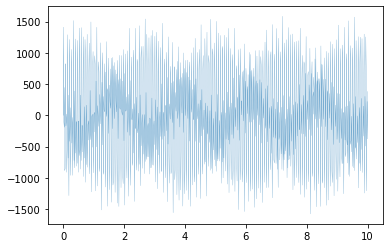

In [14]:
plt.plot(t, data, linewidth = 0.2)

## CPU Implementation

In [19]:
import time
start_time = time.time()
golden_output = np.fft.fft(data)
end_time = time.time()
sw_exec_time = end_time-start_time
print("Software Execution Time: ", sw_exec_time)

Software Execution Time:  0.0018451213836669922


In [21]:
freq = np.fft.fftfreq(samples)
freq

array([ 0.        ,  0.00097656,  0.00195312, ..., -0.00292969,
       -0.00195312, -0.00097656])

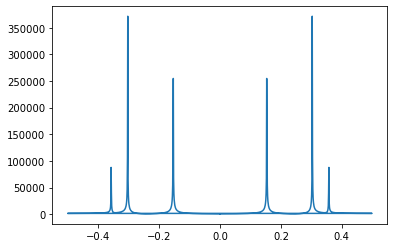

In [23]:
plt.plot(freq, np.abs(golden_output))

## PL Implementation

In [24]:
from pynq import allocate

In [25]:
input_buffer = allocate((1024,), np.csingle)
output_buffer = allocate((1024,), np.csingle)

np.copyto(input_buffer, data)
input_buffer

PynqBuffer([   0.     +0.j, 1411.7784 +0.j, -104.79156+0.j, ...,
             222.78162+0.j, -377.02924+0.j,  383.07367+0.j],
           dtype=complex64)

In [28]:
start_time = time.time()

data_channel.sendchannel.transfer(input_buffer)
data_channel.recvchannel.transfer(output_buffer)
data_channel.sendchannel.wait()
data_channel.recvchannel.wait()

end_time = time.time()
hw_exec_time = end_time - start_time
print("Hardware Execution time: ", hw_exec_time)
print("Software Execution time: ", sw_exec_time)

Hardware Execution time:  0.008203744888305664
Software Execution time:  0.0018451213836669922


The Execution time of both hardware and software is comparable in this case (1024 point fft). With higher point ffts the hardware acceleration will show significant improvements. The purpose of this notbook is to understand the flow of implementation.

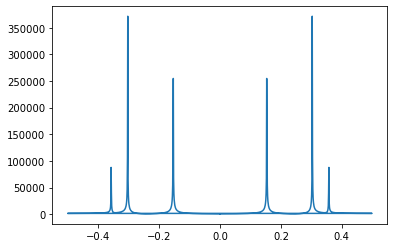

In [29]:
plt.plot(freq, np.abs(output_buffer))

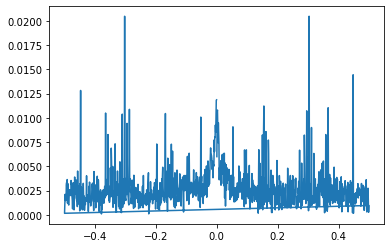

In [31]:
plt.plot(freq, np.abs((golden_output) - (output_buffer)))